# Likelyhood Weighting


## Problem Statement

With $n$ binary random variables $B_i$ $\in$ $\{0, 1\}$ and an integer random variable $Z$. Let 
$$f(B) = \sum_{i=1}^{n} 2^{i−1}B_i$$
denote the nonnegative integer whose binary representation is given by $B_nB_{n−1} \dots B_2B_1$. Suppose that each bit has prior probability $P(B_i=1)= \frac{1}{2}$, and that
$$P(Z|B_1, B_2, \dots B_n) = \left( \frac{1 - \alpha}{1 + \alpha} \right) \alpha^{|Z - f(B)|}$$
where $0 < \alpha < 1$ is a parameter measuring the amount of noise in the conversion from binary to decimal. (Larger values of α indicate greater levels of noise.)

---

Consider that there are $n = 10$ bits and noise level $\alpha = 0.1$. Use the method of likelihood weighting to estimate the probability $P(B_i = 1|Z = 128)$ for $i \in \{2, 5, 8, 10\}$.

In [31]:
import numpy as np
from progressbar import progressbar
import matplotlib.pyplot as plt
import copy

In [32]:
def bits_to_number(bits):
    num = 0
    arr = np.squeeze(bits)
    assert len(arr) == 10
    for i in range(len(arr)):
        num += (arr[i] * (2**i))
    return num

In [33]:
def prob(alpha, Z, number):
    temp = alpha ** (abs(Z - number))
    return ((1 - alpha) / (1 + alpha)) * temp

In [34]:
def sample(sample_size):
    data = np.zeros((sample_size, 11))
    for i in progressbar( range(sample_size) ):
        random_bits = np.random.choice([0,1],size = 10, p = [.5,.5])
        data[i, 0:10] = random_bits
        fb = bits_to_number(random_bits)
        prob_ = prob(0.1, 128, fb)
        data[i, -1] = prob_
    return data


def simulate(samples, sample_size):
    data = copy.deepcopy(samples)
    np.random.shuffle(data)
    data = samples[0:sample_size, :]
    
    b2s = data[:, 1] ; b2s = np.squeeze(b2s)
    b5s = data[:, 4] ; b5s = np.squeeze(b5s)
    b8s = data[:, 7] ; b8s = np.squeeze(b8s)
    b10s = data[:, 9] ; b10s = np.squeeze(b10s)
    probs = data[:, -1] ; probs = np.squeeze(probs)
    
    deno = np.sum(probs)
    pb2 = np.dot(b2s, probs) / deno
    pb5 = np.dot(b5s, probs) / deno
    pb8 = np.dot(b8s, probs) / deno
    pb10 = np.dot(b10s, probs) /deno
    
    return pb2, pb5, pb8, pb10


In [35]:
# get all samples
all_samples = sample(10000001)

100% (10000001 of 10000001) |############| Elapsed Time: 0:02:21 Time:  0:02:21


In [36]:
sample_sizes = [i for i in range(0, 10000001, 100000)]
sample_sizes = sample_sizes[1:]

pb2s = []
pb5s = []
pb8s = []
pb10s = []

for size in progressbar( sample_sizes ):
    pb2, pb5, pb8, pb10 = simulate(all_samples, size)
    pb2s.append(pb2)
    pb5s.append(pb5)
    pb8s.append(pb8)
    pb10s.append(pb10)

100% (100 of 100) |######################| Elapsed Time: 0:10:57 Time:  0:10:57


In [37]:
print(f"P(B_2 =1 | Z =128) = {pb2s[-1]}")
print(f"P(B_5 =1 | Z =128) = {pb5s[-1]}")
print(f"P(B_8 =1 | Z =128) = {pb8s[-1]}")
print(f"P(B_10 =1 | Z =128) = {pb10s[-1]}")

P(B_2 =1 | Z =128) = 0.1010754831135658
P(B_5 =1 | Z =128) = 0.09296027761267711
P(B_8 =1 | Z =128) = 0.9070397223872287
P(B_10 =1 | Z =128) = 0.0


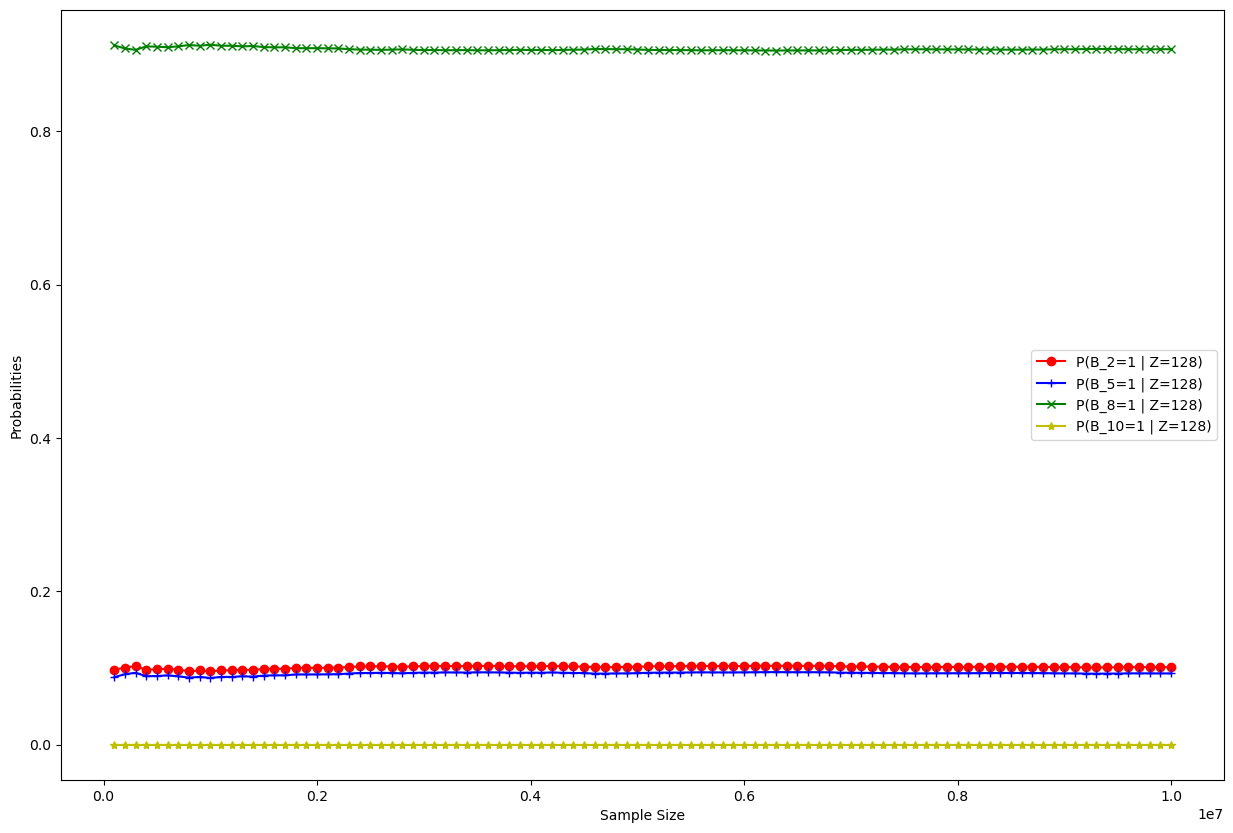

In [38]:
plt.figure(figsize=(15,10))


plt.plot(sample_sizes, pb2s, 'o-', color='r', label = 'P(B_2=1 | Z=128)')
plt.plot(sample_sizes, pb5s, '+-', color='b', label = 'P(B_5=1 | Z=128)')
plt.plot(sample_sizes, pb8s, 'x-', color='g', label = 'P(B_8=1 | Z=128)')
plt.plot(sample_sizes, pb10s, '*-', color='y', label = 'P(B_10=1 | Z=128)')

plt.legend()
plt.ylabel('Probabilities')
plt.xlabel('Sample Size')

plt.show()